In [1]:
#imports
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
from os import walk
import numpy as np
import random
from skimage.measure import block_reduce
import time

In [2]:
#SETTINGS
wav_dataset = "C:\\Users\\Filip\\Desktop\\Jupyter\\wav_dataset"
npy_dataset = "C:\\Users\\Filip\\Desktop\\Jupyter\\npy_dataset"
class_label = ["down","go","left","on","right","stop","up"]

In [3]:
#make spectrogram out of wav_file, transform it (reshape,gray,normalize)
#and save it as a file.npy
def make_spectrogram(wav_file,save_file):
    nfft=512
    overlap=511
    #read file
    sr, data = wavfile.read(wav_file)
    #make subplot out of it
    figure,axes = plt.subplots(1)
    figure.subplots_adjust(left=0,right=1,bottom=0,top=1)
    axes.axis("off")
    #make spectrogram
    axes.specgram(x=data,Fs=sr,noverlap=overlap,NFFT=nfft)
    axes.axis("off")
    #change figsize
    plt.rcParams["figure.figsize"]=[0.75,0.5]
    figure.canvas.draw()
    #get size and convert image to RGB byte string
    width, height = figure.get_size_inches() * figure.get_dpi()
    image = np.frombuffer(figure.canvas.tostring_rgb(), dtype=np.uint8)
    #reshape
    image = np.reshape(image, (int(height), int(width), 3))
    plt.close(figure)
    #make image gray
    gray = np.dot(image[...,:3],[0.299,0.587,0.114])
    #normalize image
    gray = (gray - gray.min())/(gray.max()-gray.min())
    np.save(save_file, gray)
    return gray

In [4]:
def walking_script(wav_dataset, npy_dataset):
    for (dir_path, dir_names, file_name) in walk(wav_dataset):
        dirs = dir_names
        break
    for dir_name in dirs:
        label_index = str(class_label.index(dir_name))
        dir_path = wav_dataset+"\\"+dir_name
        index = 0
        for file in os.listdir(dir_path):
            save_path = npy_dataset+"\\"+label_index+"_"+dir_name+"_"+str(index)+".npy"
            file_path = dir_path+"\\"+file
            make_spectrogram(file_path,save_path)
            if (index%100 == 0):
                print("converted {}".format(save_path))
            index += 1
            if (index == 1000):
                break

converted C:\Users\Filip\Desktop\Jupyter\npy_dataset\0_down_0.npy


c:\program files\python37\lib\site-packages\matplotlib\axes\_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


converted C:\Users\Filip\Desktop\Jupyter\npy_dataset\0_down_100.npy
converted C:\Users\Filip\Desktop\Jupyter\npy_dataset\0_down_200.npy
converted C:\Users\Filip\Desktop\Jupyter\npy_dataset\0_down_300.npy
converted C:\Users\Filip\Desktop\Jupyter\npy_dataset\0_down_400.npy
converted C:\Users\Filip\Desktop\Jupyter\npy_dataset\0_down_500.npy


KeyboardInterrupt: 

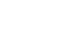

In [5]:
start_time = time.time()
walking_script(wav_dataset, npy_dataset)
finish_time = time.time()

print("Converting .wav to .npy files finished in {} seconds".format(finish_time-start_time))